<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module2_Lab2_AIML-/blob/main/MODULE2_LAB2_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 2: Appreciating, Interpreting and Visualizing Data**


Lab2 : Principal Components Analysis (PCA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_data=load_breast_cancer().data
print("Features: ",breast_data.shape[1])
print("Instances: ",breast_data.shape[0])
breast_labels=np.reshape(load_breast_cancer().target,(569,1))
print("Target: ",breast_labels.shape)

Features:  30
Instances:  569
Target:  (569, 1)


In [ ]:
final_breast_data = np.concatenate([breast_data, breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
X = breast_dataset.iloc[:,:30].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))

(569, 30) (569,)


# 1. Standradization of the data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(np.shape(X_std))
print(np.std(X_std))


(569, 30)
1.0


In [ ]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features
X_std_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# 2. Computing the convarianvce matrix

In [ ]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=1/(X_std.shape[0]-1)*(X_std-mean_vec).T.dot(X_std-mean_vec)
print("Covariance matrix first 3 rows and columns")
print(cov_mat[0:3,0:3])
cov_mat.shape

Covariance matrix first 3 rows and columns
[[1.00176056 0.32435193 0.99961207]
 [0.32435193 1.00176056 0.33011322]
 [0.99961207 0.33011322 1.00176056]]


(30, 30)

In [ ]:
con_mat_numpy=np.cov(X_std.T)
print("Covariance matrix first 3 rows and columns")
print(con_mat_numpy[0:3,0:3])
con_mat_numpy.shape

Covariance matrix first 3 rows and columns
[[1.00176056 0.32435193 0.99961207]
 [0.32435193 1.00176056 0.33011322]
 [0.99961207 0.33011322 1.00176056]]


(30, 30)

# 3. Calculating the eigenvectors and eigenvalues

In [ ]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [ ]:
eig_vals.shape,eig_vecs.shape

((30,), (30, 30))

# 4. Computing the Principal Compenents

In [ ]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x:x[0],reverse=True)
total=sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Explained Variance:")
print("Cummalative Explained Variance:")
print(cum_var_exp)


Explained Variance:
Cummalative Explained Variance:
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


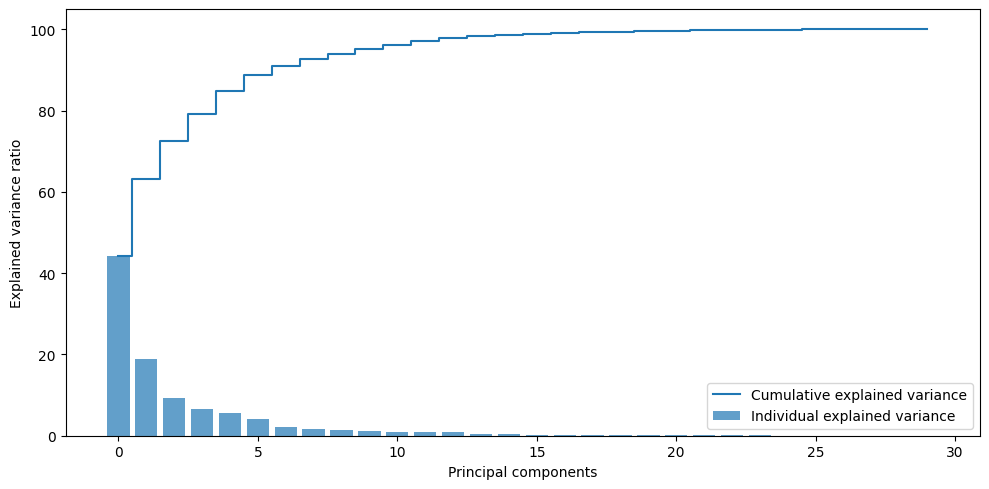

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(30),var_exp,alpha=0.7,align='center',label='Individual explained variance')
plt.step(range(30),cum_var_exp,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 5. Reducing the dimensions of the data set

In [ ]:
matrix_w=np.hstack((eig_pairs[0][1].reshape(30,1),eig_pairs[1][1].reshape(30,1)))
Y=X_std.dot(matrix_w)
print(Y)

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y_sklearn = pca.fit_transform(X_std)
principalComponents = pca.fit_transform(X_std)
print(Y_sklearn)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


# Let's visualize our dataset in 2 and 3 dimensions now

In [ ]:
final_df=pd.DataFrame(columns=["PC1","PC2","PC3","Label"])
for i in range(len(Y)):
  dicti=dict()
  dicti["PC1"]=Y[i][0]
  dicti["PC2"]=Y[i][1]
  dicti["PC3"]=Y_sklearn[i][0]
  if (int(breast_labels[i][0]==0)):
    dicti["Label"]="Benign"
  else:
    dicti["Label"]="Malignant"
  final_df=pd.concat([final_df,pd.DataFrame([dicti])],ignore_index=True)
final_df.head()

<ipython-input-18-dad2c44a2d8e>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df=pd.concat([final_df,pd.DataFrame([dicti])],ignore_index=True)


,PC1,PC2,PC3,Label
0,9.192837,1.948583,9.192837,Benign
1,2.387802,-3.768172,2.387802,Benign
2,5.733896,-1.075174,5.733896,Benign
3,7.122953,10.275589,7.122953,Benign
4,3.935302,-1.948072,3.935302,Benign


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.show(renderer="colab")


In [ ]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#556B2F',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"
    ))
fig.update_traces(marker=dict(size=15,))

fig.show(renderer = "colab")

# Exercise

1.   How many components do you need to retain 90% of the variance in the data?

To retain 90% of the variance, check the cumulative explained variance array (cum_var_exp).
look for the first value in cum_var_exp that reaches 90%.

2.  Find one other use case that makes use of PCA and summarize how it is applied to the problem domain.

Image Compression: PCA is widely used for reducing the dimensionality of image data while preserving essential structures. In image compression, an image (a high-dimensional dataset) is represented by a matrix where each pixel is a feature.
PCA transforms this data into a new set of features (principal components), where only the first few components are kept, significantly reducing the amount of data stored.